In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
tt = pd.read_csv('titanic.csv')
tt.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:

tt['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [4]:
tt['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [5]:
tt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
tt.drop('Cabin',axis=1,inplace=True)

In [7]:
tt['Age'].fillna(29.69,inplace =True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6008\215545444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt['Age'].fillna(29.69,inplace =True)


In [8]:
tt["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
tt["Embarked"].fillna('S',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6008\2758402321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt["Embarked"].fillna('S',inplace=True)


In [10]:
tt.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
gender_count = tt['Sex'].value_counts()
gender_count

Sex
male      577
female    314
Name: count, dtype: int64

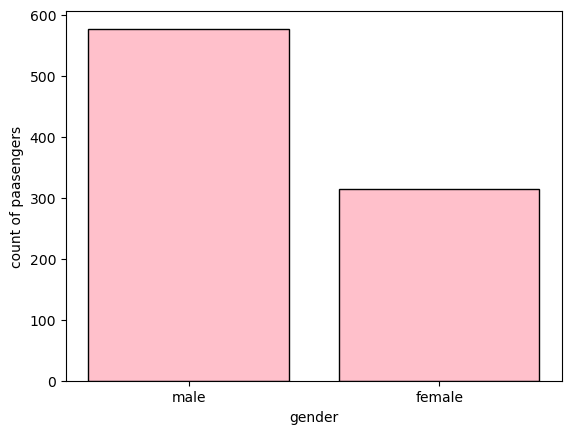

In [12]:
plt.bar(gender_count.index,gender_count.values,color= 'pink',edgecolor = 'black')
plt.xlabel('gender')
plt.ylabel('count of paasengers')
plt.show()

In [13]:
survived_count = tt.Survived.value_counts()
survived_count

Survived
0    549
1    342
Name: count, dtype: int64

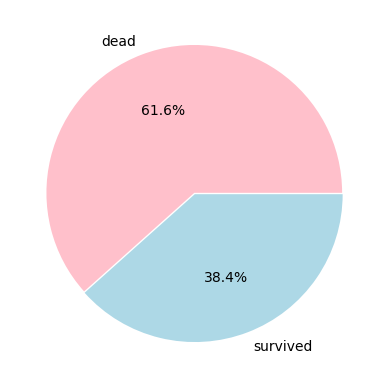

In [14]:
plt.pie(survived_count,labels=['dead','survived'],autopct='%1.1f%%',colors = ['pink','lightblue'],
        explode=[0.01,0])
plt.show()
        

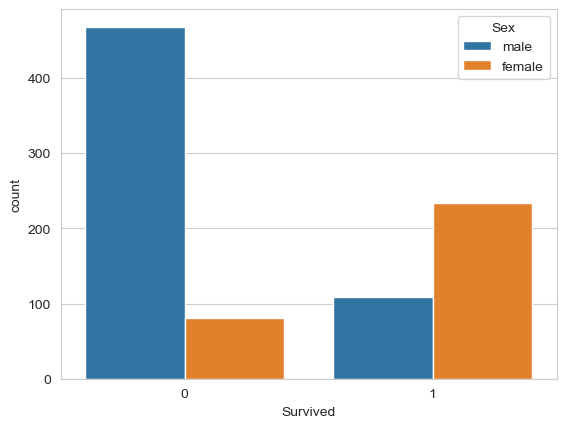

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Sex',data = tt)
plt.show()

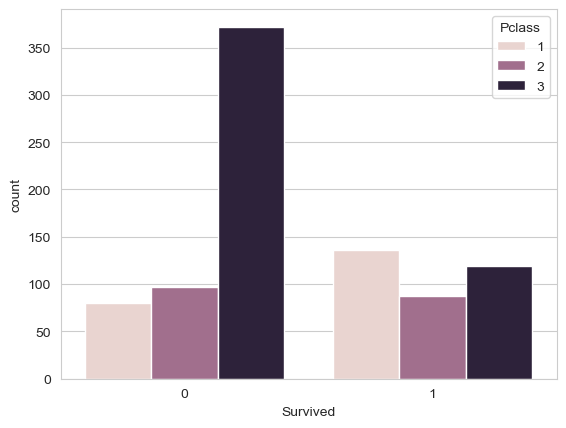

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Pclass',data = tt)
plt.show()

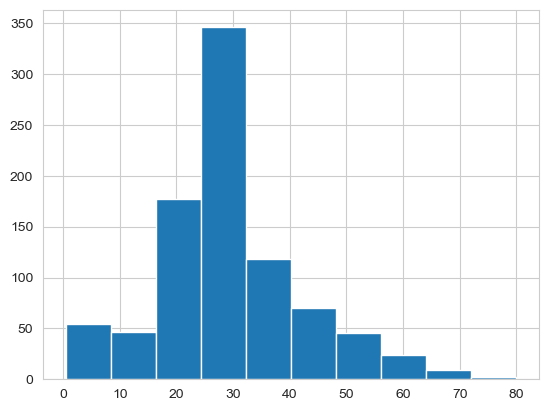

In [17]:
plt.hist(tt['Age'])
plt.show()

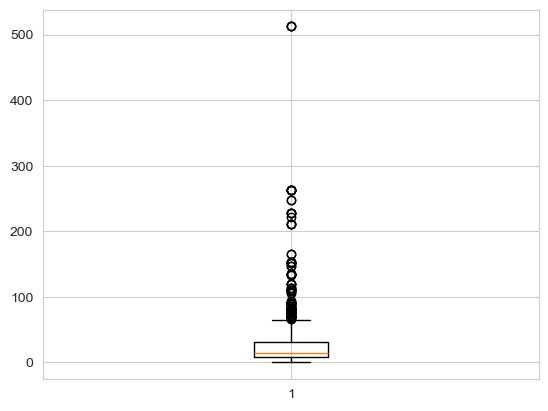

In [18]:
plt.boxplot(tt['Fare'])
plt.show()

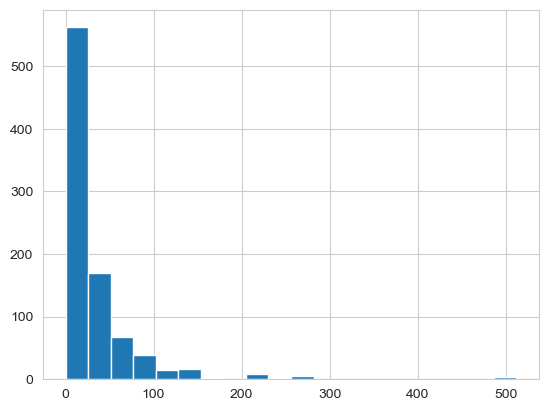

In [19]:
plt.hist(tt.Fare,bins=20)
plt.show()

In [20]:
print('the average ticket fare is:',np.mean(tt.Fare))

the average ticket fare is: 32.204207968574636


In [21]:
print('the average ticket fare of first class:',np.mean(tt[tt['Pclass']==1]['Fare']))

the average ticket fare of first class: 84.1546875


In [22]:
print('the average ticket fare of second class:',np.mean(tt[tt['Pclass']==2]['Fare']))

the average ticket fare of second class: 20.662183152173913


In [23]:
print('the average ticket fare of third class:',np.mean(tt[tt['Pclass']==3]['Fare']))

the average ticket fare of third class: 13.675550101832993


In [24]:
#using group by
avg_fares=tt.groupby('Pclass')['Fare'].mean()
avg_fares

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

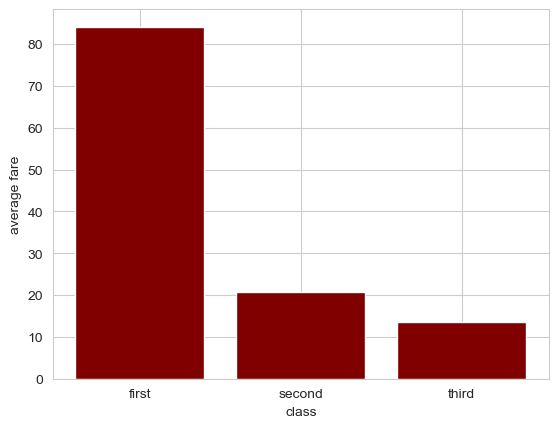

In [25]:
plt.bar(['first','second','third'],avg_fares.values,color = 'maroon')
plt.xlabel('class')
plt.ylabel('average fare')
plt.show()

In [26]:
#encoding Sex columns 
from sklearn.preprocessing import LabelEncoder

In [27]:
encode = LabelEncoder()
tt['Sex'] = encode.fit_transform(tt['Sex'])

In [28]:
tt.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S


In [29]:
X = tt[['Pclass','Sex','Age','Fare']]
y = tt['Survived']

In [30]:
x_tr,x_te,y_tr,y_te = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(x_tr,y_tr)

LogisticRegression()

In [33]:
y_pred = model.predict(x_te)

In [34]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
y_te[0:10]

625    0
181    0
382    0
270    0
112    0
145    0
885    0
361    0
695    0
245    0
Name: Survived, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score
print('the percentage accuracy of model is:',accuracy_score(y_te,y_pred)*100)

the percentage accuracy of model is: 79.3296089385475


In [37]:
from sklearn.metrics import confusion_matrix   #91 and 51 daigonalof correctness
confusion_matrix(y_te , y_pred)                        #14 and 23 are daigonalof wrongness

array([[91, 14],
       [23, 51]], dtype=int64)

In [38]:
#correctdiagonal  divided by totaldiagonal  value is our result 

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
depth = [1,2,3,4,5,6,7,8,9,10]
accuracies =[]
for i in depth:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_tr,y_tr)
    y_pred = model.predict(x_te)
    accuracies.append(accuracy_score(y_te,y_pred)*100)

In [41]:
for i in range(len(depth)):
    print(f"accuracy of decision tree with depth{depth[i]} is {accuracies[i]}")

accuracy of decision tree with depth1 is 78.2122905027933
accuracy of decision tree with depth2 is 77.6536312849162
accuracy of decision tree with depth3 is 81.00558659217877
accuracy of decision tree with depth4 is 82.68156424581005
accuracy of decision tree with depth5 is 82.68156424581005
accuracy of decision tree with depth6 is 81.56424581005587
accuracy of decision tree with depth7 is 79.88826815642457
accuracy of decision tree with depth8 is 77.6536312849162
accuracy of decision tree with depth9 is 78.2122905027933
accuracy of decision tree with depth10 is 79.3296089385475


In [42]:
y_pred = model.predict(x_te)
print('the accuracy of decission tree is:',accuracy_score(y_te,y_pred)*100)

the accuracy of decission tree is: 79.3296089385475


In [43]:
confusion_matrix(y_te,y_pred)

array([[91, 14],
       [23, 51]], dtype=int64)

In [88]:
from sklearn.neighbors import  KNeighborsClassifier

In [90]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te,y_pred)*100

66.4804469273743

In [92]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te,y_pred)*100

68.15642458100558

In [96]:
from sklearn.naive_bayes import GaussianNB  #naive bayes


In [98]:
model =  GaussianNB()
model.fit(x_tr,y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te,y_pred)*100

77.09497206703911